# PROJETO 1 - Ciência dos Dados

### Nome : André Barone Rocco

# Proposta:

Verificar se a formação do Mercado Comum do Sul (Mercosul) impactou perceptivelmente na melhoria econômica e no padrão de vida de Países-Membros (Brasil, Argentina, Paraguai, Uruguai) quando comparados com outros países da América do Sul (associados ou não ao mercosul) desde o princípio da União, em 1991, até 2007. Essa comparação é importante pois a partir dela podemos concluir se a permanência ou introdução de um país nesse mercado comum é vantajoso e se eleva o padrão de vida de seus cidadãos. A decisão de comparar com outros países da América do Sul é para validar a questão utilizando países de níveis de desenvolvimento, condições geográficas e históricas similares.

## Pergunta:

Como se comportam o crescimento do PIB/capita e o IDH de países do Mercosul comparados a outros países sul-americanos quando vistos anualmente lado-a-lado?

## Hipótese:

Espera-se que os membros interinos apresentem uma elevação no crescimento do PIB/capita e um IDH maior do que seus vizinhos devido às vantagens provenientes de sua inclusão no grupo.

### Índice de Desenvolvimento Humano:
* Índice concebido pela Organização das Nações Unidas (ONU) para avaliar a qualidade de vida e o desenvolvimento econômico de uma população. Este índice é estabelecido a partir de 3 dimensões: `Saúde`:expectativa de vida ao nascer, `Educação`: média de anos de estudo (adultos) e anos esperados de escolaridade (crianças) e `Renda`:medido pela Renda Nacional Bruta (RNB) com base na Paridade de Poder de Compra (PPC) por habitante.
* Medido de 0 a 1 (Quanto mais perto de 1, mais desenvolvido é o país).

### Crescimento Anual do PIB per capita:
* O Produto Interno Bruto é a soma de todos os bens de um país dividido por seu número de habitantes, medido em dólares. Quanto maior o PIB, mais desenvolvido o país. No caso desta comparação, será usado o `crescimento anual` do PIB/capita.

## Mercosul
* O Mercosul (ou Mercado Comum do Sul) é um bloco econômico formado pelo Brasil, Paraguai, Uruguai e Argentina (Estados Partes). A Venezuela está atualmente suspensa da União. O bloco foi estabelecido em 1991 pelo tratado de Asunción e em 1994 pelo Protocolo de Ouro Preto. Atualmente é configurada como uma união aduaneira, com livre comércio entre seus Países-Membros. Isto dá uma vantagem econômica aos países da União. 
[Vantagens e prinípios do Mercosul](http://www.itamaraty.gov.br/pt-BR/politica-externa/integracao-regional/686-mercosul).

In [1]:
#importando Bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Atribuindo planilhas a uma variável

In [2]:
dados = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
dadoshdi = pd.read_excel('hdi_human_development_index.xlsx')

In [3]:
#visualização inicial dos dados
dados.head(10)

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.170,3.850,11.200,1.130,0.837,2.110,2.680,2.760,3.020,3.380
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.980,2.490,2.280,1.720,2.610,3.820,4.720,5.030,5.030,5.230
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.060,0.857,1.160,1.610,2.180,2.100,2.360,2.500,2.630,2.680
3,Andorra,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,...,-4.780,-4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,...,0.594,1.030,2.130,1.030,2.240,2.460,2.770,0.262,3.460,3.550
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.530,-2.960,2.790,0.468,1.620,1.900,2.200,2.200,2.200,2.200
6,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.940,7.650,0.761,3.090,-0.622,-0.128,0.367,0.861,0.861,0.861
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190,3.660,6.920,2.980,4.050,4.290,4.490,4.790,4.790,4.790
8,Australia,0.21600,0.21600,0.21600,0.21600,0.21600,0.21600,0.21600,0.21600,0.21600,...,1.440,1.060,1.780,1.170,1.410,1.480,1.730,1.700,1.710,1.770
9,Austria,0.38800,0.38800,0.38800,0.38800,0.38800,0.38800,0.38800,0.38800,0.38800,...,1.750,2.290,0.336,0.131,1.270,1.310,1.200,1.030,1.030,0.991


In [4]:
dadoshdi.head(10)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.781,0.786,0.788,0.783,0.782,0.778,0.781,0.782,0.784,0.786
6,Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,...,0.788,0.792,0.794,0.802,0.816,0.822,0.823,0.825,0.826,0.827
7,Armenia,0.634,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,...,0.707,0.721,0.725,0.720,0.729,0.732,0.736,0.739,0.741,0.743
8,Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,0.894,...,0.918,0.921,0.925,0.927,0.927,0.930,0.933,0.936,0.937,0.939
9,Austria,0.794,0.798,0.804,0.806,0.812,0.816,0.819,0.823,0.833,...,0.860,0.864,0.870,0.872,0.880,0.884,0.887,0.892,0.892,0.893


### Criando tabela com apenas os anos relevantes em PIB

In [5]:
dados_ano = dados.loc[:,['country', 1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]]

### Criando tabela com apenas os anos relevantes em IDH

In [6]:
dadoshdi_ano = dadoshdi.loc[:,['country', 1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]]

### Usando `JOIN` para juntar dataframes

In [7]:
dados_idx = dados_ano.set_index('country')
dadoshdi_idx = dadoshdi_ano.set_index('country')

In [8]:
dados_join = dados_idx.join(dadoshdi_idx, how='inner', lsuffix= '_PIB', rsuffix= '_IDH')
#dados_join = dados_join.rename(columns={1991:'1991_PIB',1992:'1992_PIB',1993:'1993_PIB',1994:'1994_PIB',1995:'1995_PIB',1996:'1996_PIB',1997:'1997_PIB',1998:'1998_PIB',1999:'1999_PIB',2000:'2000_PIB',2001:'2001_PIB',2002:'2002_PIB',2003:'2003_PIB',2004:'2004_PIB',2005:'2005_PIB',2006:'2006_PIB',2007:'2007_PIB'}, inplace=True)

### Criando categorias para diferenciar países relevantes dos demais na planilha

In [10]:
#Criando colunas dos Países relevantes
dados_join['Mercosul'] = 0
dados_join['Associados'] = 0

In [11]:
#Criando lista de Países do Mercosul
lista_merc = ['Argentina','Brazil','Paraguay','Uruguay']
#Criando lista de Países Sul-Americanos não-integrantes
lista_sa = ['Bolivia','Chile','Colombia','Ecuador','Guyana','Peru','Venezuela']

In [12]:
#Atribuindo '1' a Países relevantes
dados_join.loc[lista_merc, ['Mercosul']] = 1
dados_join.loc[lista_sa, ['Associados']] = 1

### PIB e IDH de Países do Mercosul na faixa escolhida

In [13]:
dados_I = dados_join.loc[dados_join.Mercosul == 1]
dados_I

,1991_PIB,1992_PIB,1993_PIB,1994_PIB,1995_PIB,1996_PIB,1997_PIB,1998_PIB,1999_PIB,2000_PIB,...,2000_IDH,2001_IDH,2002_IDH,2003_IDH,2004_IDH,2005_IDH,2006_IDH,2007_IDH,Mercosul,Associados
country,,,,,,,,,,,,,,,,,,,,,
Argentina,9.290,8.54,4.66,4.770,-3.91,4.46,7.050,2.79,-4.450,-1.85,...,0.771,0.776,0.770,0.775,0.780,0.782,0.788,0.792,1,0
Brazil,-0.548,-2.08,3.42,4.390,2.79,1.26,1.890,-1.22,-0.529,3.03,...,0.685,0.692,0.699,0.695,0.694,0.698,0.700,0.704,1,0
Paraguay,-0.381,-1.14,1.10,0.149,1.63,-1.47,-0.172,-3.06,-2.160,-3.01,...,0.624,0.632,0.642,0.639,0.646,0.648,0.649,0.654,1,0
Uruguay,2.170,6.66,2.40,4.750,-2.67,4.26,4.220,3.90,-3.370,-1.88,...,0.742,0.746,0.747,0.750,0.753,0.756,0.760,0.770,1,0


### PIB e IDH de Países não-integrantes na faixa escolhida

In [14]:
dados_nI = dados_join.loc[dados_join.Associados == 1 ]
dados_nI

,1991_PIB,1992_PIB,1993_PIB,1994_PIB,1995_PIB,1996_PIB,1997_PIB,1998_PIB,1999_PIB,2000_PIB,...,2000_IDH,2001_IDH,2002_IDH,2003_IDH,2004_IDH,2005_IDH,2006_IDH,2007_IDH,Mercosul,Associados
country,,,,,,,,,,,,,,,,,,,,,
Bolivia,2.930,-0.689,1.8000,2.46,2.430,2.2000,2.85,3.11,-1.520,0.507,...,0.607,0.610,0.617,0.620,0.622,0.625,0.626,0.632,0,1
Chile,6.150,10.400,5.3300,6.25,6.840,5.9200,5.18,1.90,-1.980,3.260,...,0.761,0.768,0.775,0.781,0.790,0.796,0.797,0.804,0,1
Colombia,0.363,2.310,3.6800,3.16,3.260,0.1540,1.57,-1.24,-5.970,1.210,...,0.653,0.656,0.659,0.658,0.658,0.669,0.675,0.683,0,1
Ecuador,2.920,0.871,0.0488,2.27,0.929,-0.0619,1.34,-1.49,-8.860,-15.800,...,0.670,0.675,0.679,0.682,0.688,0.693,0.696,0.698,0,1
Guyana,6.030,7.580,7.8000,8.13,4.770,7.8800,6.38,-1.49,3.160,-1.310,...,0.606,0.609,0.611,0.613,0.619,0.622,0.620,0.618,0,1
Peru,0.372,-2.950,3.5300,11.30,6.450,0.3710,6.66,-1.59,-0.709,1.520,...,0.677,0.686,0.686,0.685,0.692,0.693,0.696,0.700,0,1
Venezuela,5.590,4.790,-1.8500,-5.91,0.235,-2.1100,4.52,-1.48,-7.680,2.040,...,0.672,0.684,0.688,0.687,0.700,0.714,0.728,0.745,0,1


In [15]:
#Dividindo tabelas por PIB e IDH (MERCOSUL)
Merc_PIB = dados_I.iloc[:,0:17]
Merc_IDH = dados_I.iloc[:,17:34]
#Dividindo tabelas por PIB e IDH (ASSOCIADOS)
Asso_PIB = dados_nI.iloc[:,0:17]
Asso_IDH = dados_nI.iloc[:,17:34]

In [16]:
Merc_PIB

,1991_PIB,1992_PIB,1993_PIB,1994_PIB,1995_PIB,1996_PIB,1997_PIB,1998_PIB,1999_PIB,2000_PIB,2001_PIB,2002_PIB,2003_PIB,2004_PIB,2005_PIB,2006_PIB,2007_PIB
country,,,,,,,,,,,,,,,,,
Argentina,9.290,8.54,4.66,4.770,-3.91,4.46,7.050,2.79,-4.450,-1.85,-5.470,-12.00,7.770,7.92,8.120,7.25,7.44
Brazil,-0.548,-2.08,3.42,4.390,2.79,1.26,1.890,-1.22,-0.529,3.03,-0.416,1.35,-0.256,4.33,1.590,2.87,5.06
Paraguay,-0.381,-1.14,1.10,0.149,1.63,-1.47,-0.172,-3.06,-2.160,-3.01,-0.567,-2.61,1.180,1.50,0.362,2.75,3.35
Uruguay,2.170,6.66,2.40,4.750,-2.67,4.26,4.220,3.90,-3.370,-1.88,-3.960,-11.50,1.640,11.20,6.080,3.82,6.24


In [17]:
Merc_IDH

,1991_IDH,1992_IDH,1993_IDH,1994_IDH,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,2000_IDH,2001_IDH,2002_IDH,2003_IDH,2004_IDH,2005_IDH,2006_IDH,2007_IDH
country,,,,,,,,,,,,,,,,,
Argentina,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782,0.788,0.792
Brazil,0.615,0.622,0.631,0.640,0.649,0.656,0.664,0.671,0.677,0.685,0.692,0.699,0.695,0.694,0.698,0.700,0.704
Paraguay,0.585,0.589,0.596,0.600,0.606,0.613,0.618,0.622,0.625,0.624,0.632,0.642,0.639,0.646,0.648,0.649,0.654
Uruguay,0.697,0.700,0.703,0.709,0.711,0.717,0.727,0.735,0.738,0.742,0.746,0.747,0.750,0.753,0.756,0.760,0.770


In [18]:
Asso_PIB

,1991_PIB,1992_PIB,1993_PIB,1994_PIB,1995_PIB,1996_PIB,1997_PIB,1998_PIB,1999_PIB,2000_PIB,2001_PIB,2002_PIB,2003_PIB,2004_PIB,2005_PIB,2006_PIB,2007_PIB
country,,,,,,,,,,,,,,,,,
Bolivia,2.930,-0.689,1.8000,2.46,2.430,2.2000,2.85,3.11,-1.520,0.507,-0.134,0.682,1.10,2.26,2.53,2.62,2.430
Chile,6.150,10.400,5.3300,6.25,6.840,5.9200,5.18,1.90,-1.980,3.260,2.200,1.060,2.82,5.12,5.26,4.76,4.160
Colombia,0.363,2.310,3.6800,3.16,3.260,0.1540,1.57,-1.24,-5.970,1.210,-0.201,0.301,2.26,3.31,3.71,5.43,5.630
Ecuador,2.920,0.871,0.0488,2.27,0.929,-0.0619,1.34,-1.49,-8.860,-15.800,3.490,-0.675,2.39,6.77,3.52,2.88,0.688
Guyana,6.030,7.580,7.8000,8.13,4.770,7.8800,6.38,-1.49,3.160,-1.310,2.180,0.878,-1.22,3.12,-2.01,4.77,6.700
Peru,0.372,-2.950,3.5300,11.30,6.450,0.3710,6.66,-1.59,-0.709,1.520,-1.320,3.400,2.47,1.76,4.95,6.10,6.670
Venezuela,5.590,4.790,-1.8500,-5.91,0.235,-2.1100,4.52,-1.48,-7.680,2.040,1.810,-10.400,-9.23,16.80,8.27,8.42,6.970


In [19]:
Asso_IDH

,1991_IDH,1992_IDH,1993_IDH,1994_IDH,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,2000_IDH,2001_IDH,2002_IDH,2003_IDH,2004_IDH,2005_IDH,2006_IDH,2007_IDH
country,,,,,,,,,,,,,,,,,
Bolivia,0.543,0.549,0.556,0.564,0.571,0.577,0.579,0.591,0.600,0.607,0.610,0.617,0.620,0.622,0.625,0.626,0.632
Chile,0.710,0.718,0.713,0.719,0.728,0.735,0.742,0.748,0.755,0.761,0.768,0.775,0.781,0.790,0.796,0.797,0.804
Colombia,0.595,0.606,0.613,0.620,0.626,0.635,0.643,0.650,0.650,0.653,0.656,0.659,0.658,0.658,0.669,0.675,0.683
Ecuador,0.646,0.650,0.654,0.658,0.662,0.664,0.668,0.671,0.668,0.670,0.675,0.679,0.682,0.688,0.693,0.696,0.698
Guyana,0.537,0.552,0.566,0.576,0.582,0.592,0.597,0.599,0.602,0.606,0.609,0.611,0.613,0.619,0.622,0.620,0.618
Peru,0.616,0.616,0.621,0.632,0.642,0.647,0.654,0.664,0.674,0.677,0.686,0.686,0.685,0.692,0.693,0.696,0.700
Venezuela,0.644,0.650,0.653,0.654,0.658,0.660,0.664,0.667,0.670,0.672,0.684,0.688,0.687,0.700,0.714,0.728,0.745


In [20]:
Merc_IDH.describe()

,1991_IDH,1992_IDH,1993_IDH,1994_IDH,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,2000_IDH,2001_IDH,2002_IDH,2003_IDH,2004_IDH,2005_IDH,2006_IDH,2007_IDH
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000
mean,0.652500,0.657750,0.663750,0.669250,0.674250,0.681000,0.688750,0.695250,0.701000,0.705500,0.71150,0.714500,0.714750,0.71825,0.721000,0.724250,0.730000
std,0.062191,0.062356,0.060428,0.059673,0.057349,0.057137,0.058762,0.060191,0.062423,0.065026,0.06338,0.056666,0.060555,0.06008,0.060011,0.062163,0.062971
min,0.585000,0.589000,0.596000,0.600000,0.606000,0.613000,0.618000,0.622000,0.625000,0.624000,0.63200,0.642000,0.639000,0.64600,0.648000,0.649000,0.654000
25%,0.607500,0.613750,0.622250,0.630000,0.638250,0.645250,0.652500,0.658750,0.664000,0.669750,0.67700,0.684750,0.681000,0.68200,0.685500,0.687250,0.691500
50%,0.656000,0.661000,0.667000,0.674500,0.680000,0.686500,0.695500,0.703000,0.707500,0.713500,0.71900,0.723000,0.722500,0.72350,0.727000,0.730000,0.737000
75%,0.701000,0.705000,0.708500,0.713750,0.716000,0.722250,0.731750,0.739500,0.744500,0.749250,0.75350,0.752750,0.756250,0.75975,0.762500,0.767000,0.775500
max,0.713000,0.720000,0.725000,0.728000,0.731000,0.738000,0.746000,0.753000,0.764000,0.771000,0.77600,0.770000,0.775000,0.78000,0.782000,0.788000,0.792000


### Média do PIB de Países do Mercosul

In [21]:
Media_Merc_PIB = Merc_PIB.mean()
Media_Merc_PIB

1991_PIB    2.63275
1992_PIB    2.99500
1993_PIB    2.89500
1994_PIB    3.51475
1995_PIB   -0.54000
1996_PIB    2.12750
1997_PIB    3.24700
1998_PIB    0.60250
1999_PIB   -2.62725
2000_PIB   -0.92750
2001_PIB   -2.60325
2002_PIB   -6.19000
2003_PIB    2.58350
2004_PIB    6.23750
2005_PIB    4.03800
2006_PIB    4.17250
2007_PIB    5.52250
dtype: float64

### Mediana do PIB de Países do Mercosul

In [22]:
Mediana_Merc_PIB = Merc_PIB.median()
Mediana_Merc_PIB

1991_PIB    0.8945
1992_PIB    2.7600
1993_PIB    2.9100
1994_PIB    4.5700
1995_PIB   -0.5200
1996_PIB    2.7600
1997_PIB    3.0550
1998_PIB    0.7850
1999_PIB   -2.7650
2000_PIB   -1.8650
2001_PIB   -2.2635
2002_PIB   -7.0550
2003_PIB    1.4100
2004_PIB    6.1250
2005_PIB    3.8350
2006_PIB    3.3450
2007_PIB    5.6500
dtype: float64

### Média do PIB de Países Associados

In [31]:
Media_Asso_PIB = Asso_PIB.mean()
Media_Asso_PIB

1991_PIB    3.479286
1992_PIB    3.187429
1993_PIB    2.905543
1994_PIB    3.951429
1995_PIB    3.559143
1996_PIB    2.050443
1997_PIB    4.071429
1998_PIB   -0.325714
1999_PIB   -3.365571
2000_PIB   -1.224714
2001_PIB    1.146429
2002_PIB   -0.679143
2003_PIB    0.084286
2004_PIB    5.591429
2005_PIB    3.747143
2006_PIB    4.997143
2007_PIB    4.749714
dtype: float64

### Mediana do PIB de Países Associados

In [32]:
Mediana_Asso_PIB = Asso_PIB.median()
Mediana_Asso_PIB

1991_PIB    2.930
1992_PIB    2.310
1993_PIB    3.530
1994_PIB    3.160
1995_PIB    3.260
1996_PIB    0.371
1997_PIB    4.520
1998_PIB   -1.480
1999_PIB   -1.980
2000_PIB    1.210
2001_PIB    1.810
2002_PIB    0.682
2003_PIB    2.260
2004_PIB    3.310
2005_PIB    3.710
2006_PIB    4.770
2007_PIB    5.630
dtype: float64

### Plotando Scatters de PIB por IDH em 1 ano (`Integrantes e Associados`)

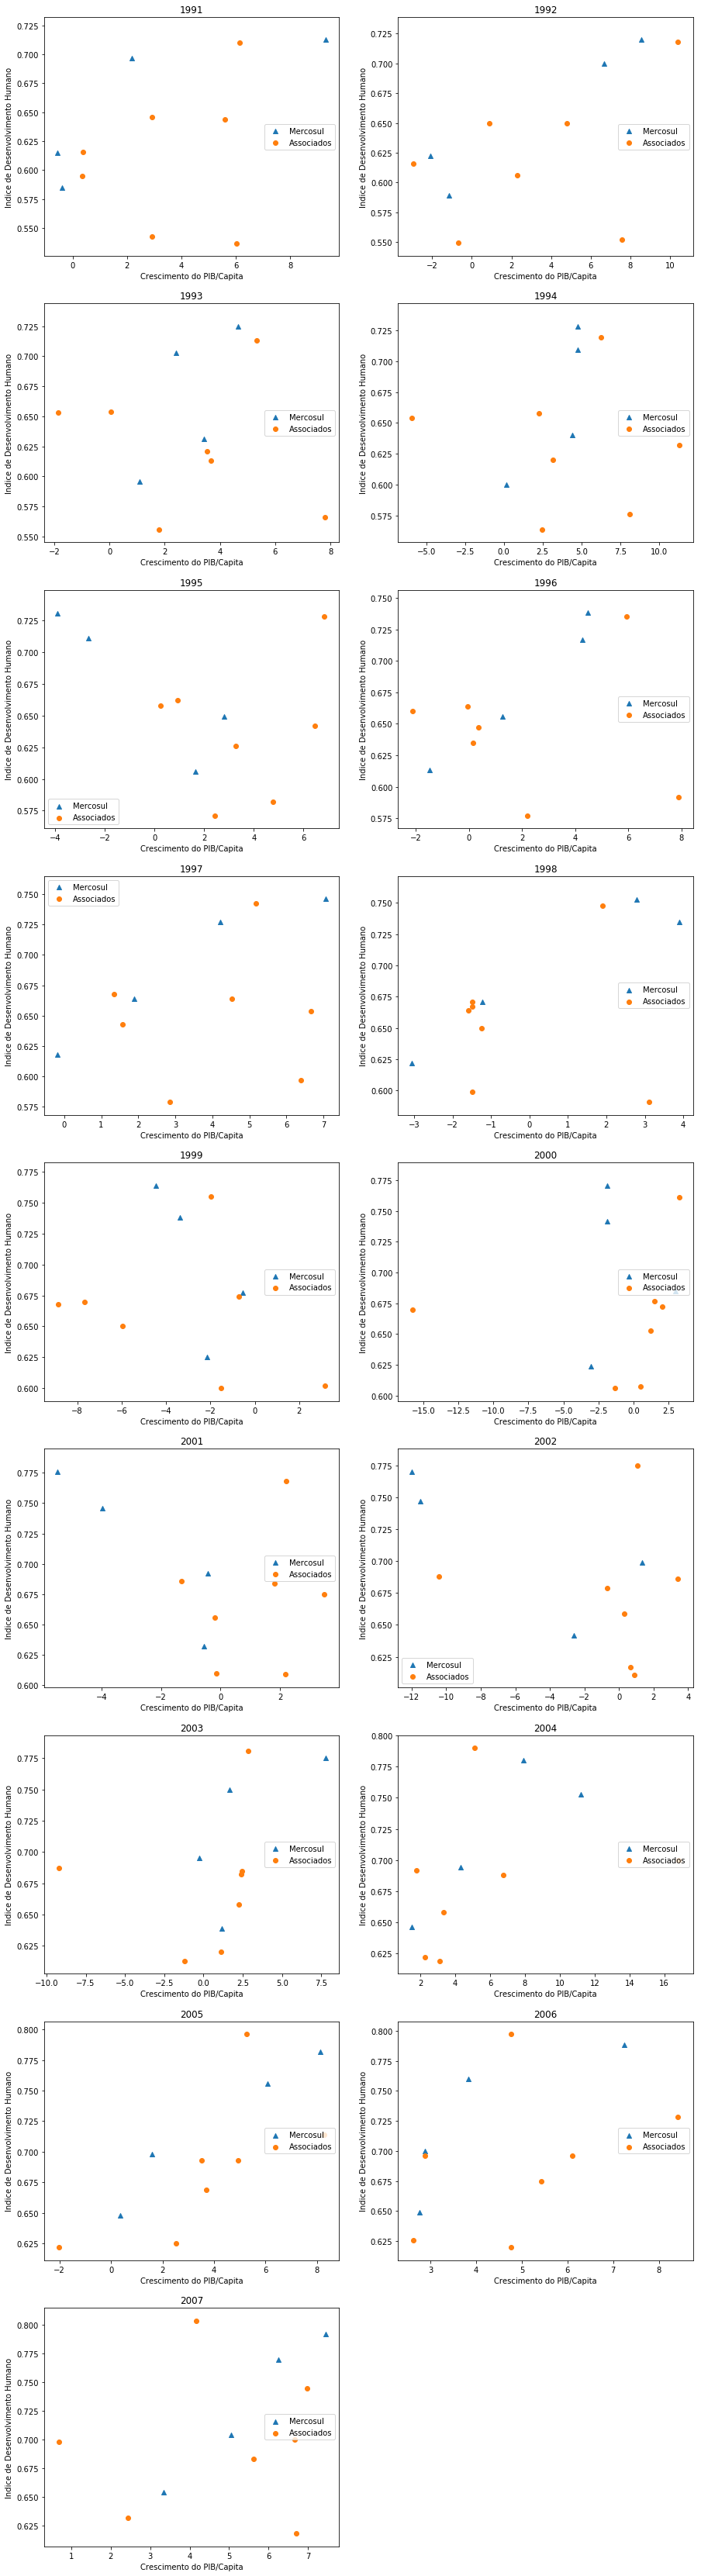

In [76]:
plt.figure(figsize=(15,60))

plt.subplot(921)
plt.scatter(dados_I['1991_PIB'], dados_I['1991_IDH'], marker = '^')
plt.scatter(dados_nI['1991_PIB'], dados_nI['1991_IDH'], marker = 'o')
plt.title('1991')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(922)
plt.scatter(dados_I['1992_PIB'], dados_I['1992_IDH'], marker = '^')
plt.scatter(dados_nI['1992_PIB'], dados_nI['1992_IDH'], marker = 'o')
plt.title('1992')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(923)
plt.scatter(dados_I['1993_PIB'], dados_I['1993_IDH'], marker = '^')
plt.scatter(dados_nI['1993_PIB'], dados_nI['1993_IDH'], marker = 'o')
plt.title('1993')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(924)
plt.scatter(dados_I['1994_PIB'], dados_I['1994_IDH'], marker = '^')
plt.scatter(dados_nI['1994_PIB'], dados_nI['1994_IDH'], marker = 'o')
plt.title('1994')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(925)
plt.scatter(dados_I['1995_PIB'], dados_I['1995_IDH'], marker = '^')
plt.scatter(dados_nI['1995_PIB'], dados_nI['1995_IDH'], marker = 'o')
plt.title('1995')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='lower left')

plt.subplot(926)
plt.scatter(dados_I['1996_PIB'], dados_I['1996_IDH'], marker = '^')
plt.scatter(dados_nI['1996_PIB'], dados_nI['1996_IDH'], marker = 'o')
plt.title('1996')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(927)
plt.scatter(dados_I['1997_PIB'], dados_I['1997_IDH'], marker = '^')
plt.scatter(dados_nI['1997_PIB'], dados_nI['1997_IDH'], marker = 'o')
plt.title('1997')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='upper left')

plt.subplot(928)
plt.scatter(dados_I['1998_PIB'], dados_I['1998_IDH'], marker = '^')
plt.scatter(dados_nI['1998_PIB'], dados_nI['1998_IDH'], marker = 'o')
plt.title('1998')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(929)
plt.scatter(dados_I['1999_PIB'], dados_I['1999_IDH'], marker = '^')
plt.scatter(dados_nI['1999_PIB'], dados_nI['1999_IDH'], marker = 'o')
plt.title('1999')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,10)
plt.scatter(dados_I['2000_PIB'], dados_I['2000_IDH'], marker = '^')
plt.scatter(dados_nI['2000_PIB'], dados_nI['2000_IDH'], marker = 'o')
plt.title('2000')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,11)
plt.scatter(dados_I['2001_PIB'], dados_I['2001_IDH'], marker = '^')
plt.scatter(dados_nI['2001_PIB'], dados_nI['2001_IDH'], marker = 'o')
plt.title('2001')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,12)
plt.scatter(dados_I['2002_PIB'], dados_I['2002_IDH'], marker = '^')
plt.scatter(dados_nI['2002_PIB'], dados_nI['2002_IDH'], marker = 'o')
plt.title('2002')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='lower left')

plt.subplot(9,2,13)
plt.scatter(dados_I['2003_PIB'], dados_I['2003_IDH'], marker = '^')
plt.scatter(dados_nI['2003_PIB'], dados_nI['2003_IDH'], marker = 'o')
plt.title('2003')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,14)
plt.scatter(dados_I['2004_PIB'], dados_I['2004_IDH'], marker = '^')
plt.scatter(dados_nI['2004_PIB'], dados_nI['2004_IDH'], marker = 'o')
plt.title('2004')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,15)
plt.scatter(dados_I['2005_PIB'], dados_I['2005_IDH'], marker = '^')
plt.scatter(dados_nI['2005_PIB'], dados_nI['2005_IDH'], marker = 'o')
plt.title('2005')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,16)
plt.scatter(dados_I['2006_PIB'], dados_I['2006_IDH'], marker = '^')
plt.scatter(dados_nI['2006_PIB'], dados_nI['2006_IDH'], marker = 'o')
plt.title('2006')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.subplot(9,2,17)
plt.scatter(dados_I['2007_PIB'], dados_I['2007_IDH'], marker = '^')
plt.scatter(dados_nI['2007_PIB'], dados_nI['2007_IDH'], marker = 'o')
plt.title('2007')
plt.xlabel('Crescimento do PIB/Capita')
plt.ylabel('Indice de Desenvolvimento Humano')
plt.legend(('Mercosul','Associados'),loc='center right')

plt.show()

## Análise dos Scatters: 
* Foram 'plotados' gráficos individuais para cada ano analisado (17 anos do princípio do Mercosul) e comparando-os lado a lado não foi possível perceber recorrências explícitas. 
* Países do Mercosul não cresceram de maneira excepcional quando comparados aos seus vizinhos e embora os integrantes tenham mantido alguns de seus países com grandes valores na maioria dos anos, isso se deve a países-exceções que cresceram (apesar de eles mesmos serem ultrapassados em 10 dos gráficos em pelo menos uma das duas variáveis).
* Não foram usadas as médias dos valores nos 'plots' pois após a análise das medianas concluiu-se que usá-las não seria um método preciso (alta assimetria).

# CONCLUSÃO:

* Por meio da análise dos dados obtidos, não foi possível obter uma resposta condizente à pergunta feita. Os aumentos do crescimento dos PIBs per capita não foram exclusivos nem repetidos o bastante em apenas um grupo para se tirar conclusões válidas relativas à pergunta (Como se comportam o crescimento do PIB/capita e o IDH de países do Mercosul comparados a outros países sul-americanos quando vistos anualmente lado-a-lado?). 

* A hipótese feita (Espera-se que os membros interinos apresentem uma elevação no crescimento do PIB/capita e um IDH maior do que seus vizinhos devido às vantagens provenientes de sua inclusão no grupo) foi provada errada pois os países do Mercosul não cresceram de maneira excepcional comparado ao resto dos países analisados.